In [5]:
pip uninstall seaborn


Found existing installation: seaborn 0.12.1
Uninstalling seaborn-0.12.1:
  Would remove:
    /home/raquelmax/.local/share/virtualenvs/db-mining-pBhgzAM8/lib/python3.7/site-packages/seaborn-0.12.1.dist-info/*
    /home/raquelmax/.local/share/virtualenvs/db-mining-pBhgzAM8/lib/python3.7/site-packages/seaborn/*
Proceed (y/n)? ^C
ERROR: Operation cancelled by user


In [1]:
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt 
import os
from util import HISTORICAL_RULES_FILE , RESOURCE_DIR
#pip install mlxtend
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
df = pd.read_excel(RESOURCE_DIR + os.sep + "historical_rules2.xlsx", keep_default_na=False)
#df = pd.read_excel(HISTORICAL_RULES_FILE , keep_default_na=False)
df2 = df.copy()
len(df)
#df.head()
df2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,frozenset({'Firebird'}),frozenset({'SapHana'}),0.015773,0.013880,0.011672,0.740000,53.313636,0.011453,3.792769,1,1
1,frozenset({'SapHana'}),frozenset({'Firebird'}),0.013880,0.015773,0.011672,0.840909,53.313636,0.011453,6.186571,1,1
2,frozenset({'Firebird'}),frozenset({'Informix'}),0.015773,0.019243,0.014511,0.920000,47.809836,0.014208,12.259464,1,1
3,frozenset({'Informix'}),frozenset({'Firebird'}),0.019243,0.015773,0.014511,0.754098,47.809836,0.014208,4.002524,1,1
4,frozenset({'SapHana'}),frozenset({'Informix'}),0.013880,0.019243,0.011356,0.818182,42.518629,0.011089,5.394164,1,1
...,...,...,...,...,...,...,...,...,...,...,...
359,frozenset({'Google Cloud Datastore'}),frozenset({'MySQL'}),0.041640,0.252681,0.020505,0.492424,1.948795,0.009983,1.472329,1,1
360,frozenset({'Ehcache'}),frozenset({'SQLite'}),0.112618,0.069401,0.013880,0.123249,1.775910,0.006064,1.061418,1,1
361,frozenset({'SQLite'}),frozenset({'Ehcache'}),0.069401,0.112618,0.013880,0.200000,1.775910,0.006064,1.109227,1,1
362,frozenset({'SQLite'}),frozenset({'Redis'}),0.069401,0.097792,0.011672,0.168182,1.719795,0.004885,1.084622,1,1


In [48]:
df['antecedents'] = df['antecedents'].astype(str)
df['consequents'] = df['consequents'].astype(str)

In [4]:
df['antecedents'] = df['antecedents'].str.removeprefix("frozenset({")
#df['antecedents'] = df['antecedents'].str.removesuffix("})")
df
#df['consequents'] = df['consequents'].str.removeprefix("frozenset({")
#df['consequents'] = df['consequents'].str.removesuffix("})")

AttributeError: 'StringMethods' object has no attribute 'removeprefix'

In [25]:
#df.replace({'frozenset': ''}, regex=True, inplace=True)
#df.replace({'frozenset({':''}, regex=True, inplace=True)
df.replace({"({":''}, regex=False, inplace=True)
df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,frozenset({'SapHana'}),frozenset({'Firebird'}),0.013880,0.015773,0.011672,0.840909,53.313636,0.011453,6.186571,1,1
1,frozenset({'Firebird'}),frozenset({'SapHana'}),0.015773,0.013880,0.011672,0.740000,53.313636,0.011453,3.792769,1,1
2,frozenset({'Firebird'}),frozenset({'Informix'}),0.015773,0.019243,0.014511,0.920000,47.809836,0.014208,12.259464,1,1
3,frozenset({'Informix'}),frozenset({'Firebird'}),0.019243,0.015773,0.014511,0.754098,47.809836,0.014208,4.002524,1,1
4,frozenset({'SapHana'}),frozenset({'Informix'}),0.013880,0.019243,0.011356,0.818182,42.518629,0.011089,5.394164,1,1
...,...,...,...,...,...,...,...,...,...,...,...
359,frozenset({'MySQL'}),frozenset({'Google Cloud Datastore'}),0.252681,0.041640,0.020505,0.081149,1.948795,0.009983,1.042997,1,1
360,frozenset({'SQLite'}),frozenset({'Ehcache'}),0.069401,0.112618,0.013880,0.200000,1.775910,0.006064,1.109227,1,1
361,frozenset({'Ehcache'}),frozenset({'SQLite'}),0.112618,0.069401,0.013880,0.123249,1.775910,0.006064,1.061418,1,1
362,frozenset({'Redis'}),frozenset({'SQLite'}),0.097792,0.069401,0.011672,0.119355,1.719795,0.004885,1.056725,1,1


Top 10 BDs Session
Presentation of the 10 most frequent BDs (consequents=antecedents).

In [5]:
rules1 = df2[(df2['consequent support'] >= 0.06)] #& (df['confidence'] > 0.7) ]
#rules2 = rules2.sort_values(['consequent support','support'], ascending=[False,False])
rules1 = rules1.groupby('consequents').mean().sort_values(['consequent support',], ascending=[False])
rules1

,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
consequents,,,,,,,,,
frozenset({'MySQL'}),0.051688,0.252681,0.039619,0.806358,3.191204,0.026558,inf,1,1
frozenset({'PostgreSQL'}),0.056649,0.158675,0.035877,0.725062,4.569476,0.026888,inf,1,1
frozenset({'H2'}),0.059845,0.155205,0.031467,0.616778,3.973958,0.022179,inf,1,1
frozenset({'Oracle'}),0.061281,0.129022,0.031505,0.631833,4.897093,0.023598,inf,1,1
frozenset({'Ehcache'}),0.082039,0.112618,0.024901,0.339419,3.013886,0.015662,1.399796,1,1
frozenset({'Redis'}),0.077760,0.097792,0.025780,0.394703,4.036159,0.018176,1.668234,1,1
frozenset({'MS SQL Server'}),0.069890,0.069716,0.026215,0.515209,7.390106,0.021342,3.571830,1,1
frozenset({'SQLite'}),0.085286,0.069401,0.022983,0.438485,6.318177,0.017064,inf,1,1
frozenset({'MongoDB'}),0.085195,0.064669,0.022082,0.328461,5.079122,0.016573,1.468378,1,1


In [30]:
rules1a = df2[(df2['antecedent support'] >= 0.06)] #& (df['confidence'] > 0.7) ]
#rules2 = rules2.sort_values(['consequent support','support'], ascending=[False,False])
rules1a = rules1a.groupby('antecedents').mean().sort_values(['antecedent support',], ascending=[False])
rules1a

,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
antecedents,,,,,,,,,
frozenset({'MySQL'}),0.252681,0.051688,0.039619,0.156795,3.191204,0.026558,1.150411,1,1
frozenset({'PostgreSQL'}),0.158675,0.056649,0.035877,0.226105,4.569476,0.026888,1.379230,1,1
frozenset({'H2'}),0.155205,0.059845,0.031467,0.202744,3.973958,0.022179,1.246066,1,1
frozenset({'Oracle'}),0.129022,0.061281,0.031505,0.244180,4.897093,0.023598,1.368828,1,1
frozenset({'Ehcache'}),0.112618,0.082039,0.024901,0.221113,3.013886,0.015662,1.207101,1,1
frozenset({'Redis'}),0.097792,0.077760,0.025780,0.263620,4.036159,0.018176,1.316406,1,1
frozenset({'MS SQL Server'}),0.069716,0.069890,0.026215,0.376018,7.390106,0.021342,2.876215,1,1
frozenset({'SQLite'}),0.069401,0.085286,0.022983,0.331169,6.318177,0.017064,1.456133,1,1
frozenset({'MongoDB'}),0.064669,0.085195,0.022082,0.341463,5.079122,0.016573,1.495914,1,1


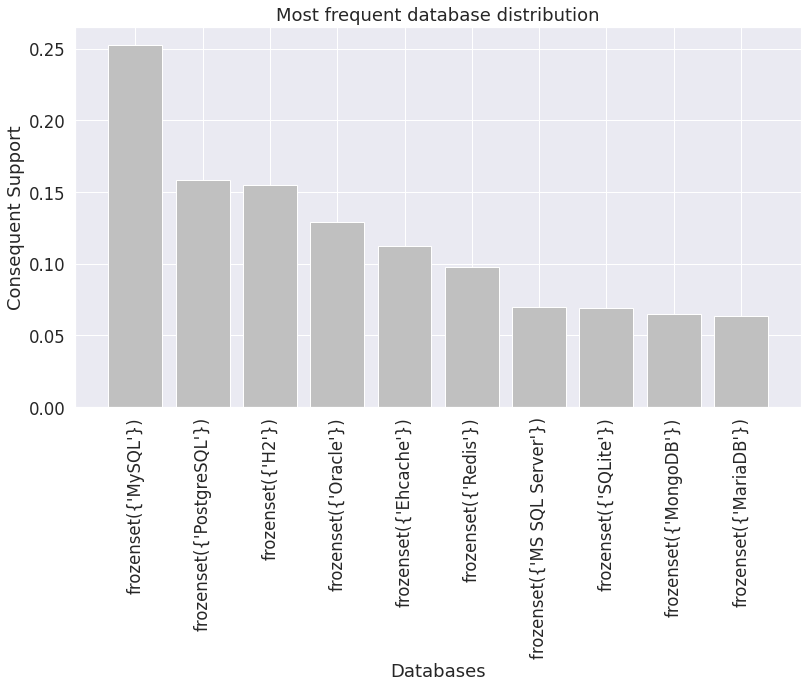

In [31]:
plt.figure(figsize=(13,7))
#plt.colorbar(orientation='horizontal')
plt.bar(rules1.index , rules1['consequent support'], color = 'silver')
plt.title('Most frequent database distribution')#Correlation of the most frequent databases
plt.xlabel("Databases")
plt.xticks(rotation=90)
plt.ylabel("Consequent Support")
plt.show() 

In [42]:
rules1c = df2.groupby(['antecedents','consequents']).mean().sort_values(['support'], ascending=[False])

#sum().plot(kind='line')

rules1c = rules1c[(rules1c['support'] >= 0.04)] 
rules1c

,,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
antecedents,consequents,,,,,,,,,
frozenset({'PostgreSQL'}),frozenset({'MySQL'}),0.158675,0.252681,0.135331,0.852883,3.375329,0.095237,5.079747,1,1
frozenset({'MySQL'}),frozenset({'PostgreSQL'}),0.252681,0.158675,0.135331,0.535581,3.375329,0.095237,1.811563,1,1
frozenset({'H2'}),frozenset({'MySQL'}),0.155205,0.252681,0.111987,0.721545,2.855551,0.072770,2.683801,1,1
frozenset({'MySQL'}),frozenset({'H2'}),0.252681,0.155205,0.111987,0.443196,2.855551,0.072770,1.517221,1,1
frozenset({'Oracle'}),frozenset({'MySQL'}),0.129022,0.252681,0.098107,0.760391,3.009289,0.065506,3.118911,1,1
frozenset({'MySQL'}),frozenset({'Oracle'}),0.252681,0.129022,0.098107,0.388265,3.009289,0.065506,1.423782,1,1
frozenset({'PostgreSQL'}),frozenset({'Oracle'}),0.158675,0.129022,0.090221,0.568588,4.406908,0.069748,2.018903,1,1
frozenset({'Oracle'}),frozenset({'PostgreSQL'}),0.129022,0.158675,0.090221,0.699267,4.406908,0.069748,2.797576,1,1
frozenset({'H2'}),frozenset({'PostgreSQL'}),0.155205,0.158675,0.085489,0.550813,3.471327,0.060862,1.872995,1,1


In [43]:
rules1c = rules1c.reset_index()
rules1c

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,frozenset({'PostgreSQL'}),frozenset({'MySQL'}),0.158675,0.252681,0.135331,0.852883,3.375329,0.095237,5.079747,1,1
1,frozenset({'MySQL'}),frozenset({'PostgreSQL'}),0.252681,0.158675,0.135331,0.535581,3.375329,0.095237,1.811563,1,1
2,frozenset({'H2'}),frozenset({'MySQL'}),0.155205,0.252681,0.111987,0.721545,2.855551,0.072770,2.683801,1,1
3,frozenset({'MySQL'}),frozenset({'H2'}),0.252681,0.155205,0.111987,0.443196,2.855551,0.072770,1.517221,1,1
4,frozenset({'Oracle'}),frozenset({'MySQL'}),0.129022,0.252681,0.098107,0.760391,3.009289,0.065506,3.118911,1,1
5,frozenset({'MySQL'}),frozenset({'Oracle'}),0.252681,0.129022,0.098107,0.388265,3.009289,0.065506,1.423782,1,1
6,frozenset({'PostgreSQL'}),frozenset({'Oracle'}),0.158675,0.129022,0.090221,0.568588,4.406908,0.069748,2.018903,1,1
7,frozenset({'Oracle'}),frozenset({'PostgreSQL'}),0.129022,0.158675,0.090221,0.699267,4.406908,0.069748,2.797576,1,1
8,frozenset({'H2'}),frozenset({'PostgreSQL'}),0.155205,0.158675,0.085489,0.550813,3.471327,0.060862,1.872995,1,1
9,frozenset({'PostgreSQL'}),frozenset({'H2'}),0.158675,0.155205,0.085489,0.538767,3.471327,0.060862,1.831603,1,1


In [46]:
import plotly.express as px 
fig = px.scatter(rules1c.sort_values(['support'], ascending=[False]), x="consequents", y="antecedents", 
size='support',  color="support", title='Correlation of the most frequent databases',
hover_data=['support']) 
#fig.title('Correlation of the most frequent databases')
fig.show()

In [35]:
import plotly.express as px 
#colors = {:'gray'}
#colors = {'Relational':'silver','NoSQL':'gray'}
#c = rules1c['support'].apply(lambda x: colors[x])

fig = px.scatter(rules1c, x="consequents", y="antecedents", size='support', title='Correlation of the most frequent databases',
color = 'support', hover_data=['support'],
color_continuous_scale = ["silver","gray"])
#color_discrete_map = 'support',
#hover_data=['support'])
##color_continuous_scale = ["black","grey11","grey21","grey31","dimgray","gray","darkgray","slategray","silver","lightgrey","gainsboro"])

#px = plt.subplot(111) #specify a subplot
#px.legend()
#for i in px.patches:
#    px.annotate(i.get_height(),(i.get_x() + i.get_width() / 2, i.get_height()),
#    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 1),textcoords='offset points')

fig.show()

In [40]:
li = rules1c.values.tolist()
glue = sns.load_dataset("li").pivot("antecedents", "consequents", "support")
sns.heatmap(glue)
#Plot confusion matrix heatmap
#plt.figure(figsize=(10, 6), facecolor='w', edgecolor='k')
#sns.set(font_scale=1.5)

#sns.heatmap(rules1c,
            #cmap='coolwarm',
            #cbar=False,
            #xticklabels=10)

#plt.xlabel('Antecedents',fontsize=22)
#plt.ylabel('Consequents',fontsize=22)

ValueError: 'li' is not one of the example datasets.

In [ ]:
rules1b = df2.groupby(['antecedents','consequents']).mean().sort_values(['support',], ascending=[False])

#sum().plot(kind='line')

rules1b = rules1b[(rules1b['support'] >= 0.04)] 
rules1b

In the rules below, we list the 10 most frequent BDs as consequents and confidence > 70%, confidence only in the case of relational ones. 
Add rules where they appear as antecedents.

In [34]:
rules2 = df[ (df['consequents'].str.contains('MySQL')) &(df['confidence'] > 0.7)]
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
209,frozenset({'SapHana'}),frozenset({'MySQL'}),0.013880,0.252681,0.013880,1.000000,3.957553,0.010373,inf,1,1
211,frozenset({'Teradata'}),frozenset({'MySQL'}),0.010726,0.252681,0.010726,1.000000,3.957553,0.008015,inf,1,1
212,frozenset({'ClickHouse'}),frozenset({'MySQL'}),0.011987,0.252681,0.011987,1.000000,3.957553,0.008958,inf,1,1
214,frozenset({'MS Access'}),frozenset({'MySQL'}),0.019558,0.252681,0.019558,1.000000,3.957553,0.014616,inf,1,1
215,frozenset({'Firebird'}),frozenset({'MySQL'}),0.015773,0.252681,0.015773,1.000000,3.957553,0.011787,inf,1,1
218,frozenset({'Amazon Redshift'}),frozenset({'MySQL'}),0.012934,0.252681,0.012934,1.000000,3.957553,0.009666,inf,1,1
223,frozenset({'SAP Adaptive Server'}),frozenset({'MySQL'}),0.034700,0.252681,0.034069,0.981818,3.885598,0.025301,41.102524,1,1
227,frozenset({'IBM DB2'}),frozenset({'MySQL'}),0.051735,0.252681,0.049527,0.957317,3.788633,0.036454,17.508607,1,1
231,frozenset({'MS SQL Server'}),frozenset({'MySQL'}),0.069716,0.252681,0.066246,0.950226,3.760571,0.048630,15.014310,1,1
244,frozenset({'MariaDB'}),frozenset({'MySQL'}),0.063407,0.252681,0.056467,0.890547,3.524388,0.040445,6.827775,1,1


In [40]:
rules3 = df[(df['consequents'].str.contains('PostgreSQL')) | (df['antecedents'].str.contains('PostgreSQL'))] #(df['confidence'] > 0.7) ]
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
128,frozenset({'Firebird'}),frozenset({'PostgreSQL'}),0.015773,0.158675,0.015773,1.000000,6.302187,0.013270,inf,1,1
129,frozenset({'PostgreSQL'}),frozenset({'Firebird'}),0.158675,0.015773,0.015773,0.099404,6.302187,0.013270,1.092861,1,1
130,frozenset({'Amazon Redshift'}),frozenset({'PostgreSQL'}),0.012934,0.158675,0.012934,1.000000,6.302187,0.010881,inf,1,1
131,frozenset({'PostgreSQL'}),frozenset({'Amazon Redshift'}),0.158675,0.012934,0.012934,0.081511,6.302187,0.010881,1.074663,1,1
132,frozenset({'PostGIS'}),frozenset({'PostgreSQL'}),0.012934,0.158675,0.012934,1.000000,6.302187,0.010881,inf,1,1
133,frozenset({'PostgreSQL'}),frozenset({'ClickHouse'}),0.158675,0.011987,0.011987,0.075547,6.302187,0.010085,1.068753,1,1
134,frozenset({'PostgreSQL'}),frozenset({'PostGIS'}),0.158675,0.012934,0.012934,0.081511,6.302187,0.010881,1.074663,1,1
135,frozenset({'ClickHouse'}),frozenset({'PostgreSQL'}),0.011987,0.158675,0.011987,1.000000,6.302187,0.010085,inf,1,1
136,frozenset({'SapHana'}),frozenset({'PostgreSQL'}),0.013880,0.158675,0.013880,1.000000,6.302187,0.011678,inf,1,1
137,frozenset({'PostgreSQL'}),frozenset({'SapHana'}),0.158675,0.013880,0.013880,0.087475,6.302187,0.011678,1.080650,1,1


In [39]:
rules4 = df[(df['consequents'].str.contains('H2')) & (df['confidence'] > 0.7) ]
rules4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
120,frozenset({'SapHana'}),frozenset({'H2'}),0.013880,0.155205,0.013880,1.000000,6.443089,0.011726,inf,1,1
121,frozenset({'Firebird'}),frozenset({'H2'}),0.015773,0.155205,0.015773,1.000000,6.443089,0.013325,inf,1,1
138,frozenset({'Teradata'}),frozenset({'H2'}),0.010726,0.155205,0.010410,0.970588,6.253587,0.008745,28.723028,1,1
143,frozenset({'Informix'}),frozenset({'H2'}),0.019243,0.155205,0.018612,0.967213,6.231841,0.015625,25.766246,1,1
159,frozenset({'SAP Adaptive Server'}),frozenset({'H2'}),0.034700,0.155205,0.030599,0.881818,5.681633,0.025214,7.148265,1,1
170,frozenset({'MS Access'}),frozenset({'H2'}),0.019558,0.155205,0.016404,0.838710,5.403881,0.013368,5.237729,1,1
178,frozenset({'IBM DB2'}),frozenset({'H2'}),0.051735,0.155205,0.041325,0.798780,5.146614,0.033295,4.198375,1,1
181,frozenset({'Amazon Redshift'}),frozenset({'H2'}),0.012934,0.155205,0.010095,0.780488,5.028753,0.008087,3.848510,1,1


In [41]:
rules5 = df[(df['consequents'].str.contains('Oracle')) & (df['confidence'] > 0.7) ]
rules5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
80,frozenset({'Firebird'}),frozenset({'Oracle'}),0.015773,0.129022,0.015773,1.000000,7.750611,0.013738,inf,1,1
81,frozenset({'SapHana'}),frozenset({'Oracle'}),0.013880,0.129022,0.013880,1.000000,7.750611,0.012089,inf,1,1
85,frozenset({'PostGIS'}),frozenset({'Oracle'}),0.012934,0.129022,0.012618,0.975610,7.561572,0.010950,35.710095,1,1
89,frozenset({'MS Access'}),frozenset({'Oracle'}),0.019558,0.129022,0.018927,0.967742,7.500592,0.016404,27.000315,1,1
92,frozenset({'SAP Adaptive Server'}),frozenset({'Oracle'}),0.034700,0.129022,0.033438,0.963636,7.468771,0.028961,23.951893,1,1
101,frozenset({'IBM DB2'}),frozenset({'Oracle'}),0.051735,0.129022,0.046372,0.896341,6.947194,0.039697,8.402375,1,1
113,frozenset({'ClickHouse'}),frozenset({'Oracle'}),0.011987,0.129022,0.010095,0.842105,6.526831,0.008548,5.516193,1,1
115,frozenset({'MS SQL Server'}),frozenset({'Oracle'}),0.069716,0.129022,0.058675,0.841629,6.523139,0.049680,5.499603,1,1
119,frozenset({'Informix'}),frozenset({'Oracle'}),0.019243,0.129022,0.016088,0.836066,6.480019,0.013606,5.312965,1,1
141,frozenset({'Amazon Redshift'}),frozenset({'Oracle'}),0.012934,0.129022,0.010410,0.804878,6.238297,0.008741,4.463762,1,1


In [42]:
rules6 = df[ (df['consequents'].str.contains('Ehcache'))]# & (df['confidence'] > 0.7) ]
rules6

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
146,frozenset({'Memcached'}),frozenset({'Ehcache'}),0.018927,0.112618,0.012934,0.683333,6.067694,0.010802,2.802258,1,1
225,frozenset({'Hazelcast'}),frozenset({'Ehcache'}),0.027760,0.112618,0.011987,0.431818,3.834352,0.008861,1.561792,1,1
269,frozenset({'Cassandra'}),frozenset({'Ehcache'}),0.031230,0.112618,0.011356,0.363636,3.228928,0.007839,1.394457,1,1
278,frozenset({'Redis'}),frozenset({'Ehcache'}),0.097792,0.112618,0.034700,0.354839,3.150809,0.023687,1.375442,1,1
284,frozenset({'SAP Adaptive Server'}),frozenset({'Ehcache'}),0.034700,0.112618,0.011987,0.345455,3.067482,0.008079,1.355722,1,1
286,frozenset({'MongoDB'}),frozenset({'Ehcache'}),0.064669,0.112618,0.022082,0.341463,3.032042,0.014799,1.347506,1,1
292,frozenset({'Elasticsearch'}),frozenset({'Ehcache'}),0.053312,0.112618,0.017981,0.337278,2.994878,0.011977,1.338996,1,1
298,frozenset({'MariaDB'}),frozenset({'Ehcache'}),0.063407,0.112618,0.021136,0.333333,2.959851,0.013995,1.331073,1,1
308,frozenset({'MS SQL Server'}),frozenset({'Ehcache'}),0.069716,0.112618,0.022397,0.321267,2.852707,0.014546,1.307409,1,1
313,frozenset({'Oracle'}),frozenset({'Ehcache'}),0.129022,0.112618,0.041009,0.317848,2.822351,0.026479,1.300857,1,1


In [43]:
rules7 = df[ (df['consequents'].str.contains('Redis'))] #& (df['confidence'] > 0.7) ]
rules7

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
78,frozenset({'Cassandra'}),frozenset({'Redis'}),0.031230,0.097792,0.024606,0.787879,8.056696,0.021552,4.253267,1,1
108,frozenset({'Solr'}),frozenset({'Redis'}),0.024606,0.097792,0.015773,0.641026,6.555004,0.013367,2.513294,1,1
160,frozenset({'HBase'}),frozenset({'Redis'}),0.034385,0.097792,0.018927,0.550459,5.628884,0.015565,2.006953,1,1
168,frozenset({'DynamoDB'}),frozenset({'Redis'}),0.025868,0.097792,0.013880,0.536585,5.487018,0.011350,1.946870,1,1
172,frozenset({'MongoDB'}),frozenset({'Redis'}),0.064669,0.097792,0.033754,0.521951,5.337372,0.027430,1.887272,1,1
174,frozenset({'Elasticsearch'}),frozenset({'Redis'}),0.053312,0.097792,0.027760,0.520710,5.324680,0.022547,1.882385,1,1
185,frozenset({'Hive'}),frozenset({'Redis'}),0.026814,0.097792,0.012618,0.470588,4.812144,0.009996,1.704171,1,1
242,frozenset({'MariaDB'}),frozenset({'Redis'}),0.063407,0.097792,0.022082,0.348259,3.561226,0.015881,1.384304,1,1
263,frozenset({'PostgreSQL'}),frozenset({'Redis'}),0.158675,0.097792,0.050789,0.320080,3.273071,0.035272,1.326932,1,1
264,frozenset({'SAP Adaptive Server'}),frozenset({'Redis'}),0.034700,0.097792,0.011041,0.318182,3.253666,0.007648,1.323239,1,1


In [44]:
rules8 = df[ (df['consequents'].str.contains('SQLite')) & (df['confidence'] > 0.7) ]
rules8

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
28,frozenset({'SapHana'}),frozenset({'SQLite'}),0.013880,0.069401,0.013880,1.000000,14.409091,0.012917,inf,1,1
31,frozenset({'Firebird'}),frozenset({'SQLite'}),0.015773,0.069401,0.014826,0.940000,13.544545,0.013732,15.509989,1,1
56,frozenset({'Informix'}),frozenset({'SQLite'}),0.019243,0.069401,0.015457,0.803279,11.574516,0.014122,4.730547,1,1
67,frozenset({'MS Access'}),frozenset({'SQLite'}),0.019558,0.069401,0.013880,0.709677,10.225806,0.012523,3.205398,1,1


In [45]:
rules9 = df[(df['consequents'].str.contains('MongoDB'))]#& (df['confidence'] > 0.7) ]
rules9

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
68,frozenset({'Cassandra'}),frozenset({'MongoDB'}),0.031230,0.064669,0.020505,0.656566,10.152747,0.018485,2.723464,1,1
96,frozenset({'DynamoDB'}),frozenset({'MongoDB'}),0.025868,0.064669,0.011987,0.463415,7.165973,0.010315,1.743117,1,1
98,frozenset({'Solr'}),frozenset({'MongoDB'}),0.024606,0.064669,0.011356,0.461538,7.136961,0.009765,1.737044,1,1
117,frozenset({'Elasticsearch'}),frozenset({'MongoDB'}),0.053312,0.064669,0.022397,0.420118,6.496464,0.018950,1.612969,1,1
124,frozenset({'HBase'}),frozenset({'MongoDB'}),0.034385,0.064669,0.014196,0.412844,6.383979,0.011972,1.592986,1,1
126,frozenset({'Hazelcast'}),frozenset({'MongoDB'}),0.027760,0.064669,0.011356,0.409091,6.325942,0.009561,1.582868,1,1
173,frozenset({'Redis'}),frozenset({'MongoDB'}),0.097792,0.064669,0.033754,0.345161,5.337372,0.027430,1.428338,1,1
196,frozenset({'MariaDB'}),frozenset({'MongoDB'}),0.063407,0.064669,0.017981,0.283582,4.385147,0.013881,1.305567,1,1
232,frozenset({'Google Cloud Datastore'}),frozenset({'MongoDB'}),0.041640,0.064669,0.010095,0.242424,3.748707,0.007402,1.234637,1,1
240,frozenset({'MS SQL Server'}),frozenset({'MongoDB'}),0.069716,0.064669,0.016088,0.230769,3.568480,0.011580,1.215931,1,1


In [46]:
rules10 = df[ (df['consequents'].str.contains('MS SQL Server')) & (df['confidence'] > 0.7) ]
rules10

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
32,frozenset({'Firebird'}),frozenset({'MS SQL Server'}),0.015773,0.069716,0.014826,0.940000,13.483258,0.013727,15.504732,1,1
35,frozenset({'SapHana'}),frozenset({'MS SQL Server'}),0.013880,0.069716,0.012934,0.931818,13.365899,0.011966,13.644164,1,1
49,frozenset({'ClickHouse'}),frozenset({'MS SQL Server'}),0.011987,0.069716,0.010095,0.842105,12.079066,0.009259,5.891798,1,1
50,frozenset({'Amazon Redshift'}),frozenset({'MS SQL Server'}),0.012934,0.069716,0.010726,0.829268,11.894934,0.009824,5.448806,1,1
61,frozenset({'Informix'}),frozenset({'MS SQL Server'}),0.019243,0.069716,0.015142,0.786885,11.286997,0.013800,4.365178,1,1
62,frozenset({'IBM DB2'}),frozenset({'MS SQL Server'}),0.051735,0.069716,0.039117,0.756098,10.845381,0.035510,3.814164,1,1
64,frozenset({'SAP Adaptive Server'}),frozenset({'MS SQL Server'}),0.034700,0.069716,0.025868,0.745455,10.692719,0.023448,3.654687,1,1


In [47]:
rules11 = df[ (df['consequents'] .str.contains('MariaDB')) & (df['confidence'] > 0.7) ]
rules11

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
46,frozenset({'Amazon Redshift'}),frozenset({'MariaDB'}),0.012934,0.063407,0.010095,0.780488,12.309186,0.009275,4.266702,1,1
54,frozenset({'Firebird'}),frozenset({'MariaDB'}),0.015773,0.063407,0.011672,0.740000,11.670647,0.010672,3.602281,1,1


Expected Patterns Session
In the rules below, we highlight the dependence presented in opposite directions and the expected correlation.

In [48]:
rules9 = df[((df['antecedents'].str.contains('MariaDB')) & (df['consequents'].str.contains('MySQL'))) | 
((df['antecedents'].str.contains('MySQL')) & (df['consequents'].str.contains('MariaDB')))]
rules9

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
244,frozenset({'MariaDB'}),frozenset({'MySQL'}),0.063407,0.252681,0.056467,0.890547,3.524388,0.040445,6.827775,1,1
245,frozenset({'MySQL'}),frozenset({'MariaDB'}),0.252681,0.063407,0.056467,0.223471,3.524388,0.040445,1.206127,1,1


In [50]:
rules10 = df2[((df2['antecedents'].str.contains('PostgreSQL')) & (df2['consequents'].str.contains('PostGIS'))) | 
((df2['antecedents'].str.contains('PostGIS')) & (df2['consequents'].str.contains('PostgreSQL')))]
rules10

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
132,frozenset({'PostGIS'}),frozenset({'PostgreSQL'}),0.012934,0.158675,0.012934,1.000000,6.302187,0.010881,inf,1,1
134,frozenset({'PostgreSQL'}),frozenset({'PostGIS'}),0.158675,0.012934,0.012934,0.081511,6.302187,0.010881,1.074663,1,1


Unexpected Patterns Session
In the rules below we highlight competition and high lift values.

In [51]:
rules12 = df2[(df2['lift'] > 20)] 
rules12

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,frozenset({'SapHana'}),frozenset({'Firebird'}),0.013880,0.015773,0.011672,0.840909,53.313636,0.011453,6.186571,1,1
1,frozenset({'Firebird'}),frozenset({'SapHana'}),0.015773,0.013880,0.011672,0.740000,53.313636,0.011453,3.792769,1,1
2,frozenset({'Firebird'}),frozenset({'Informix'}),0.015773,0.019243,0.014511,0.920000,47.809836,0.014208,12.259464,1,1
3,frozenset({'Informix'}),frozenset({'Firebird'}),0.019243,0.015773,0.014511,0.754098,47.809836,0.014208,4.002524,1,1
4,frozenset({'SapHana'}),frozenset({'Informix'}),0.013880,0.019243,0.011356,0.818182,42.518629,0.011089,5.394164,1,1
5,frozenset({'Informix'}),frozenset({'SapHana'}),0.019243,0.013880,0.011356,0.590164,42.518629,0.011089,2.406132,1,1
6,frozenset({'MS Access'}),frozenset({'Informix'}),0.019558,0.019243,0.010095,0.516129,26.821787,0.009718,2.026898,1,1
7,frozenset({'Informix'}),frozenset({'MS Access'}),0.019243,0.019558,0.010095,0.524590,26.821787,0.009718,2.062308,1,1
8,frozenset({'Firebird'}),frozenset({'SAP Adaptive Server'}),0.015773,0.034700,0.013565,0.860000,24.783636,0.013017,6.894998,1,1
9,frozenset({'SAP Adaptive Server'}),frozenset({'Firebird'}),0.034700,0.015773,0.013565,0.390909,24.783636,0.013017,1.615895,1,1


In [ ]:
#if you need to generate the rules in excel
#rules_filter = df2.to_excel('historical_filters.xlsx', index=False)